# 08-2 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = (
    keras.datasets.fashion_mnist.load_data()
)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()
model.add(
    keras.layers.Conv2D(
        32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)
    )
)

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

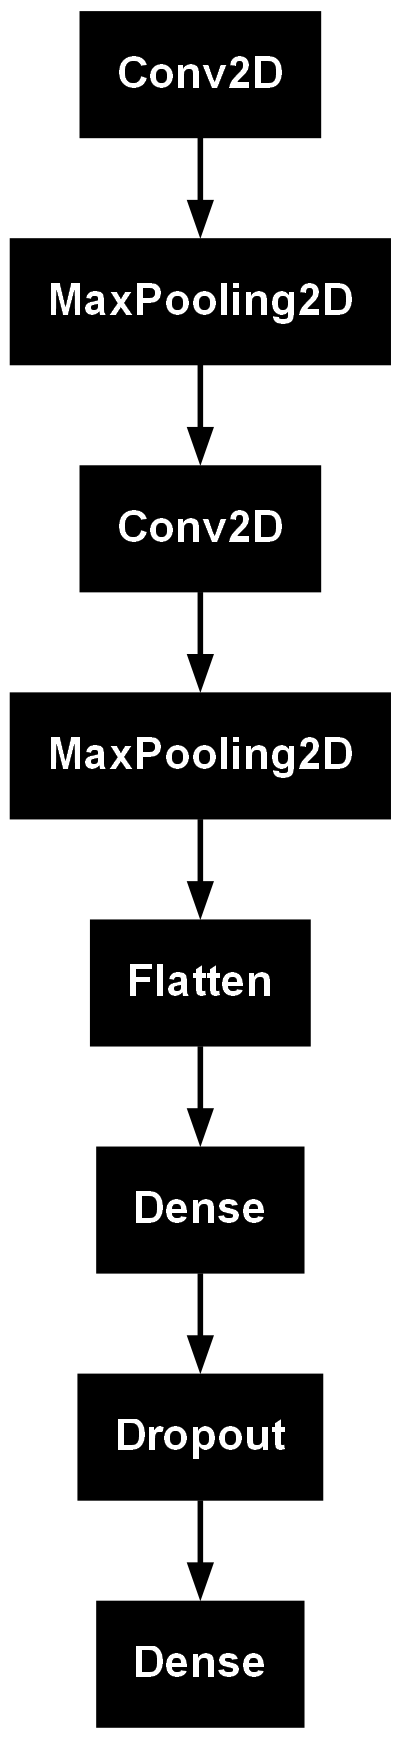

In [7]:
keras.utils.plot_model(model)

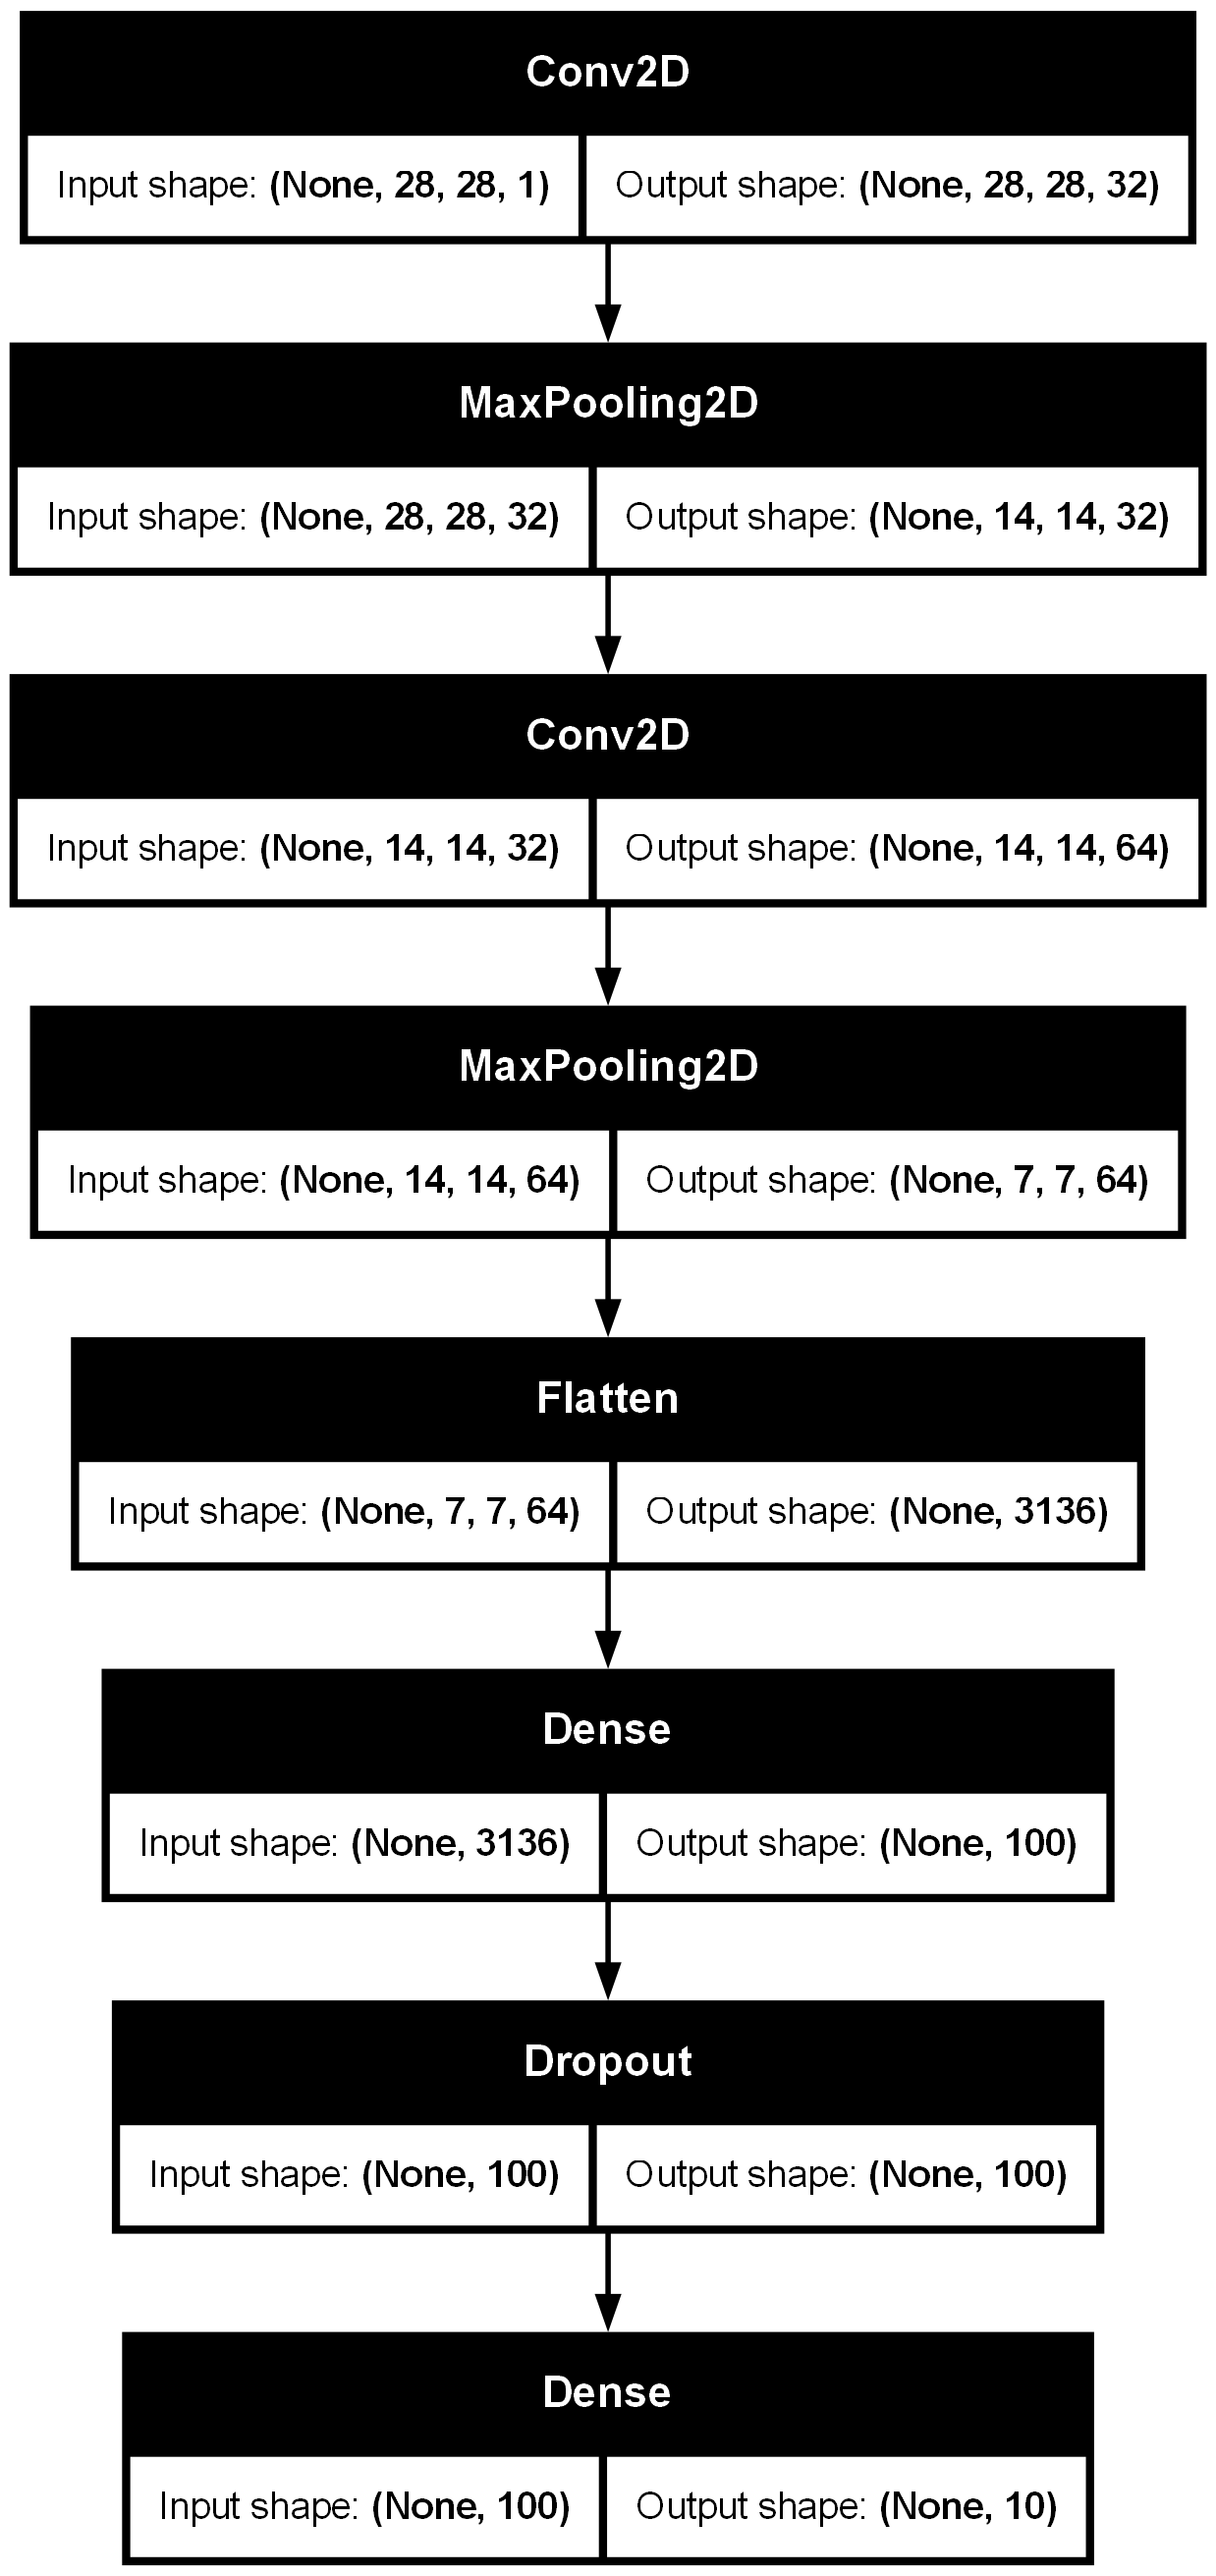

In [8]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [9]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best-cnn-model.keras", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7467 - loss: 0.7117 - val_accuracy: 0.8788 - val_loss: 0.3257
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8705 - loss: 0.3602 - val_accuracy: 0.8956 - val_loss: 0.2857
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8879 - loss: 0.3059 - val_accuracy: 0.8968 - val_loss: 0.2796
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9002 - loss: 0.2730 - val_accuracy: 0.9066 - val_loss: 0.2533
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9113 - loss: 0.2471 - val_accuracy: 0.9121 - val_loss: 0.2324
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9195 - loss: 0.2215 - val_accuracy: 0.9178 - val_loss: 0.2295
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9248 - loss: 0.2007 - val_accuracy: 0.9178 - val_loss: 0.2299
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9287 - loss: 0.1859 - 

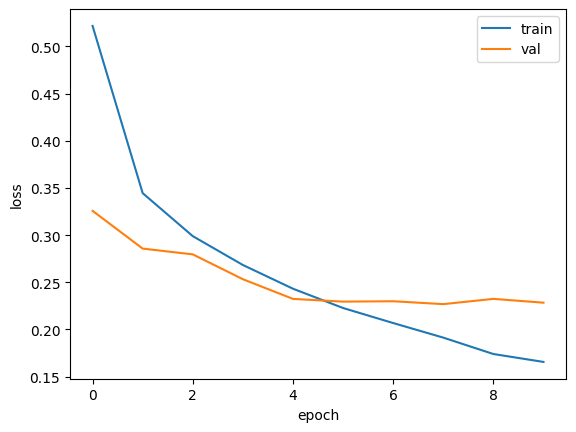

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9218 - loss: 0.2147


[0.22684989869594574, 0.9184166789054871]

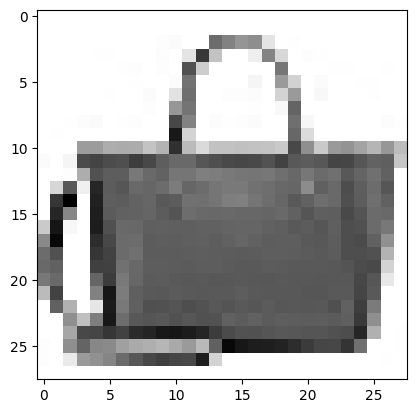

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap="gray_r")
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[2.4377574e-16 1.3231657e-27 4.7803559e-21 4.6344115e-21 1.0355002e-17
  1.3114825e-19 5.7032155e-18 1.5003335e-19 1.0000000e+00 1.7159763e-22]]


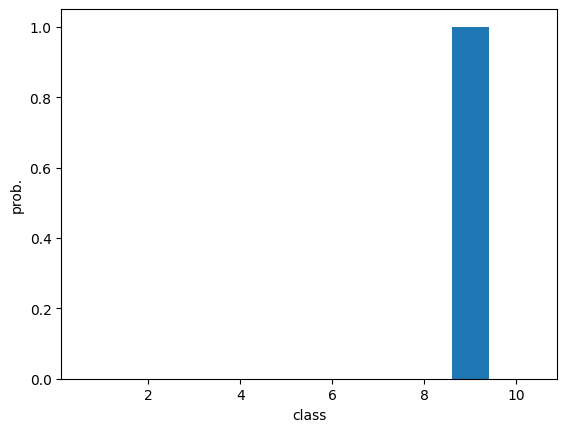

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [15]:
classes = [
    "티셔츠",
    "바지",
    "스웨터",
    "드레스",
    "코트",
    "샌달",
    "셔츠",
    "스니커즈",
    "가방",
    "앵클 부츠",
]

In [16]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9077 - loss: 0.2675


[0.25446072220802307, 0.909600019454956]